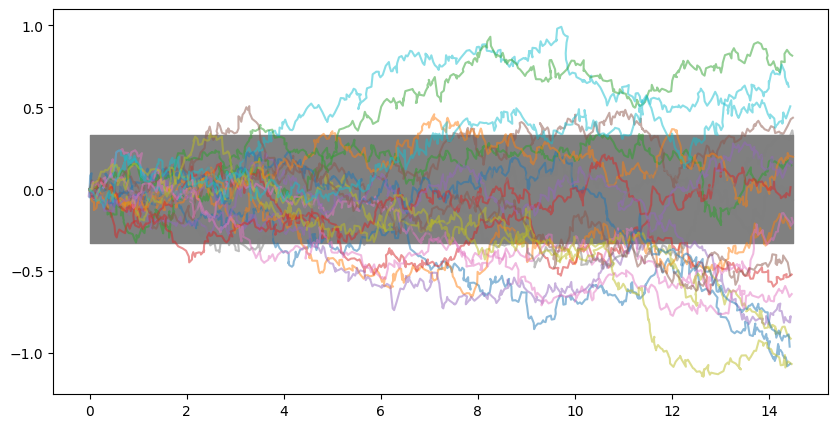

In [133]:
import numpy as np 
import matplotlib.pyplot as plt



def f(x, y, u1, u2):
    if abs(y) < d / 2:
        return u1
    else:
        return u2
 

def euler_maruyama(f, T, N, x0, u1, u2, D):
    dt = T/N
    t = np.linspace(0, T, N)
    x = np.zeros(N)
    x[0] = x0
    for i in range(1, N):
        x[i] = x[i-1] + f(x[i-1],y, u1, u2)*dt + np.sqrt(2* D * dt)*np.random.standard_normal()
    return t, x

def euler_maruyama2D(f, T, N, x0, y0, u1, u2, D):
    dt = T/N
    t = np.linspace(0, T, N)
    x = np.zeros(N)
    y = np.zeros(N)
    x[0] = x0
    y[0] = y0
    for i in range(1, N):
        x[i] = x[i-1] + f(x[i-1], y[i-1], u1, u2)*dt + np.random.normal(0, np.sqrt(2* D * dt))
        y[i] = y[i-1] + np.random.normal(0, np.sqrt(2* D * dt))
    return t, x, y

# Diffusion coefficient
D = 0.03696 # mm^2/min
u_in = 2.99 # mm / min
u_out = 3.37 # mm / min

l = 14.5 # mm
d = 0.329 * 2 # mm
w2 = 0.071  # mm

x0 = 0
y0 = 0
T = 100
N = 10000
fig, ax = plt.subplots(figsize = (10,5))

for i in range(20):
    t, x, y = euler_maruyama2D(f, T, N, x0, y0, u_in, u_out, D)

    x = x[x < l]
    y = y[:len(x)]
    ax.plot(x,y, alpha = 0.5)
ax.fill_between([0, l], [-d/2, -d/2], [d/2, d/2], color = 'gray', alpha = 1)
# ax.set_ylim(-3,3)